In [1]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

In [2]:
import pandas as pd
import numpy as np

import  matplotlib.pyplot as plt
import pickle

from chemistry import Molecule
from util import score
from pprint import pprint


In [3]:
with open('../data/molecules_enh.pickle', 'rb') as f:
    molecules = pickle.load(f)

m = molecules['dsgdb9nsd_000002']
m.compute_path(2, 3)
m

m = molecules['dsgdb9nsd_000014']
i0, i1 = 2, 3
p0, p1 = m.positions[i0], m.positions[i1]
mid = (p0 + p1) * 0.5
other_atoms = list(range(m.n_atoms))
other_atoms.remove(i0)
other_atoms.remove(i1)
p = m.positions[other_atoms]
diff = p - mid
dist = np.linalg.norm(diff, axis=1)
print(dist)
print(dist.argsort()[0:2])
print(dist[dist.argsort()[0:2]])

In [4]:
structures = pd.read_feather('../data/structures_enh.feather')
molecules_df = pd.read_feather('../data/molecules.feather')
labelled = pd.read_feather('../data/train.feather')
unlabelled = pd.read_feather('../data/test.feather')

In [5]:
labelled_enh = labelled.merge(molecules_df, left_on='molecule_name', right_on='molecule_name')
#labelled_enh.head(32)

In [6]:
unlabelled_enh = unlabelled.merge(molecules_df, left_on='molecule_name', right_on='molecule_name')
#unlabelled_enh.head(32)

In [ ]:
len(labelled), len(labelled_enh)

In [48]:
from models import SKModel, partition_data

data_df = labelled[labelled.type == '1JHC'].head(10)
#data_df = labelled_enh.head(16)
train_df, valid_df, test_df = partition_data(data_df, train_frac=1)
train_df = train_df#.copy()
        
model = SKModel(dict(molecules=molecules,
                     structures=structures), fit_args={})
input_df, numeric_df, output_df = model.setup_data(train_df, train_df)
None

In [ ]:
model.structures.columns

In [ ]:
list(input_df.columns)

In [ ]:
list(numeric_df.columns)

In [ ]:
unlabelled_enh['type'].iloc[0]

In [ ]:
numeric_df.head(60)

In [ ]:
list(zip(input_df.columns, input_df.loc[14], input_df.loc[15]))

In [ ]:
import itertools

In [70]:
lgb_model_args = dict(n_jobs=8,
                      max_depth=16,
                      boosting_type='gbdt',
                      num_leaves=65536, #128,
                      min_child_samples=20,
                      min_data_in_leaf=100,
                      learning_rate=0.1,
                      n_estimators=2000,
                      reg_alpha=0.1,
                      reg_lambda=0.3,
                      bagging_fraction = 0.9,
                      bagging_freq = 5,
                      #num_iterations=200
                      )
lgb_fit_args = dict(early_stopping_rounds=100, verbose=100)

Training 50000 samples for 1JHC
  Setting up data
  Fitting model


/home/gautham/apps/anaconda3/envs/kaggle-cpu/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



Training until validation scores don't improve for 20 rounds.
[100]	valid_0's l2: 3.43236
[200]	valid_0's l2: 2.87189
Did not meet early stopping. Best iteration is:
[200]	valid_0's l2: 2.87189
  Setting up data
  Fitting model
  Evaluating model
1JHC score: 0.13698950544950325 (trained on 50000 elements)
Training 21681 samples for 1JHN
  Setting up data
  Fitting model


/home/gautham/apps/anaconda3/envs/kaggle-cpu/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



Training until validation scores don't improve for 20 rounds.
[100]	valid_0's l2: 0.559822
[200]	valid_0's l2: 0.4854
Did not meet early stopping. Best iteration is:
[200]	valid_0's l2: 0.4854
  Setting up data
  Fitting model
  Evaluating model
1JHN score: -0.7690003843725464 (trained on 21681 elements)
Training 50000 samples for 2JHC
  Setting up data
  Fitting model


/home/gautham/apps/anaconda3/envs/kaggle-cpu/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



Training until validation scores don't improve for 20 rounds.
[100]	valid_0's l2: 1.026
[200]	valid_0's l2: 0.840446
Did not meet early stopping. Best iteration is:
[200]	valid_0's l2: 0.840446
  Setting up data
  Fitting model
  Evaluating model
2JHC score: -0.6598706515715056 (trained on 50000 elements)
Training 50000 samples for 2JHH
  Setting up data
  Fitting model


/home/gautham/apps/anaconda3/envs/kaggle-cpu/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



Training until validation scores don't improve for 20 rounds.
[100]	valid_0's l2: 0.299494
[200]	valid_0's l2: 0.256527
Did not meet early stopping. Best iteration is:
[200]	valid_0's l2: 0.256527
  Setting up data
  Fitting model
  Evaluating model
2JHH score: -1.2342400759156342 (trained on 50000 elements)
Training 50000 samples for 2JHN
  Setting up data
  Fitting model


/home/gautham/apps/anaconda3/envs/kaggle-cpu/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



Training until validation scores don't improve for 20 rounds.
[100]	valid_0's l2: 0.182298
[200]	valid_0's l2: 0.150605
Did not meet early stopping. Best iteration is:
[200]	valid_0's l2: 0.150605
  Setting up data
  Fitting model
  Evaluating model
2JHN score: -1.4848314414049673 (trained on 50000 elements)
Training 50000 samples for 3JHC
  Setting up data
  Fitting model


/home/gautham/apps/anaconda3/envs/kaggle-cpu/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



Training until validation scores don't improve for 20 rounds.
[100]	valid_0's l2: 0.539951
[200]	valid_0's l2: 0.458234
Did not meet early stopping. Best iteration is:
[200]	valid_0's l2: 0.458234
  Setting up data
  Fitting model
  Evaluating model
3JHC score: -0.8419296622255743 (trained on 50000 elements)
Training 50000 samples for 3JHH
  Setting up data
  Fitting model


/home/gautham/apps/anaconda3/envs/kaggle-cpu/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



Training until validation scores don't improve for 20 rounds.
[100]	valid_0's l2: 0.255656
[200]	valid_0's l2: 0.210318
Did not meet early stopping. Best iteration is:
[200]	valid_0's l2: 0.210318
  Setting up data
  Fitting model
  Evaluating model
3JHH score: -1.2638196277659297 (trained on 50000 elements)
Training 50000 samples for 3JHN
  Setting up data
  Fitting model


/home/gautham/apps/anaconda3/envs/kaggle-cpu/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



Training until validation scores don't improve for 20 rounds.
[100]	valid_0's l2: 0.0912623
[200]	valid_0's l2: 0.0761573
Did not meet early stopping. Best iteration is:
[200]	valid_0's l2: 0.0761573
  Setting up data
  Fitting model
  Evaluating model
3JHN score: -1.7696629824630346 (trained on 50000 elements)


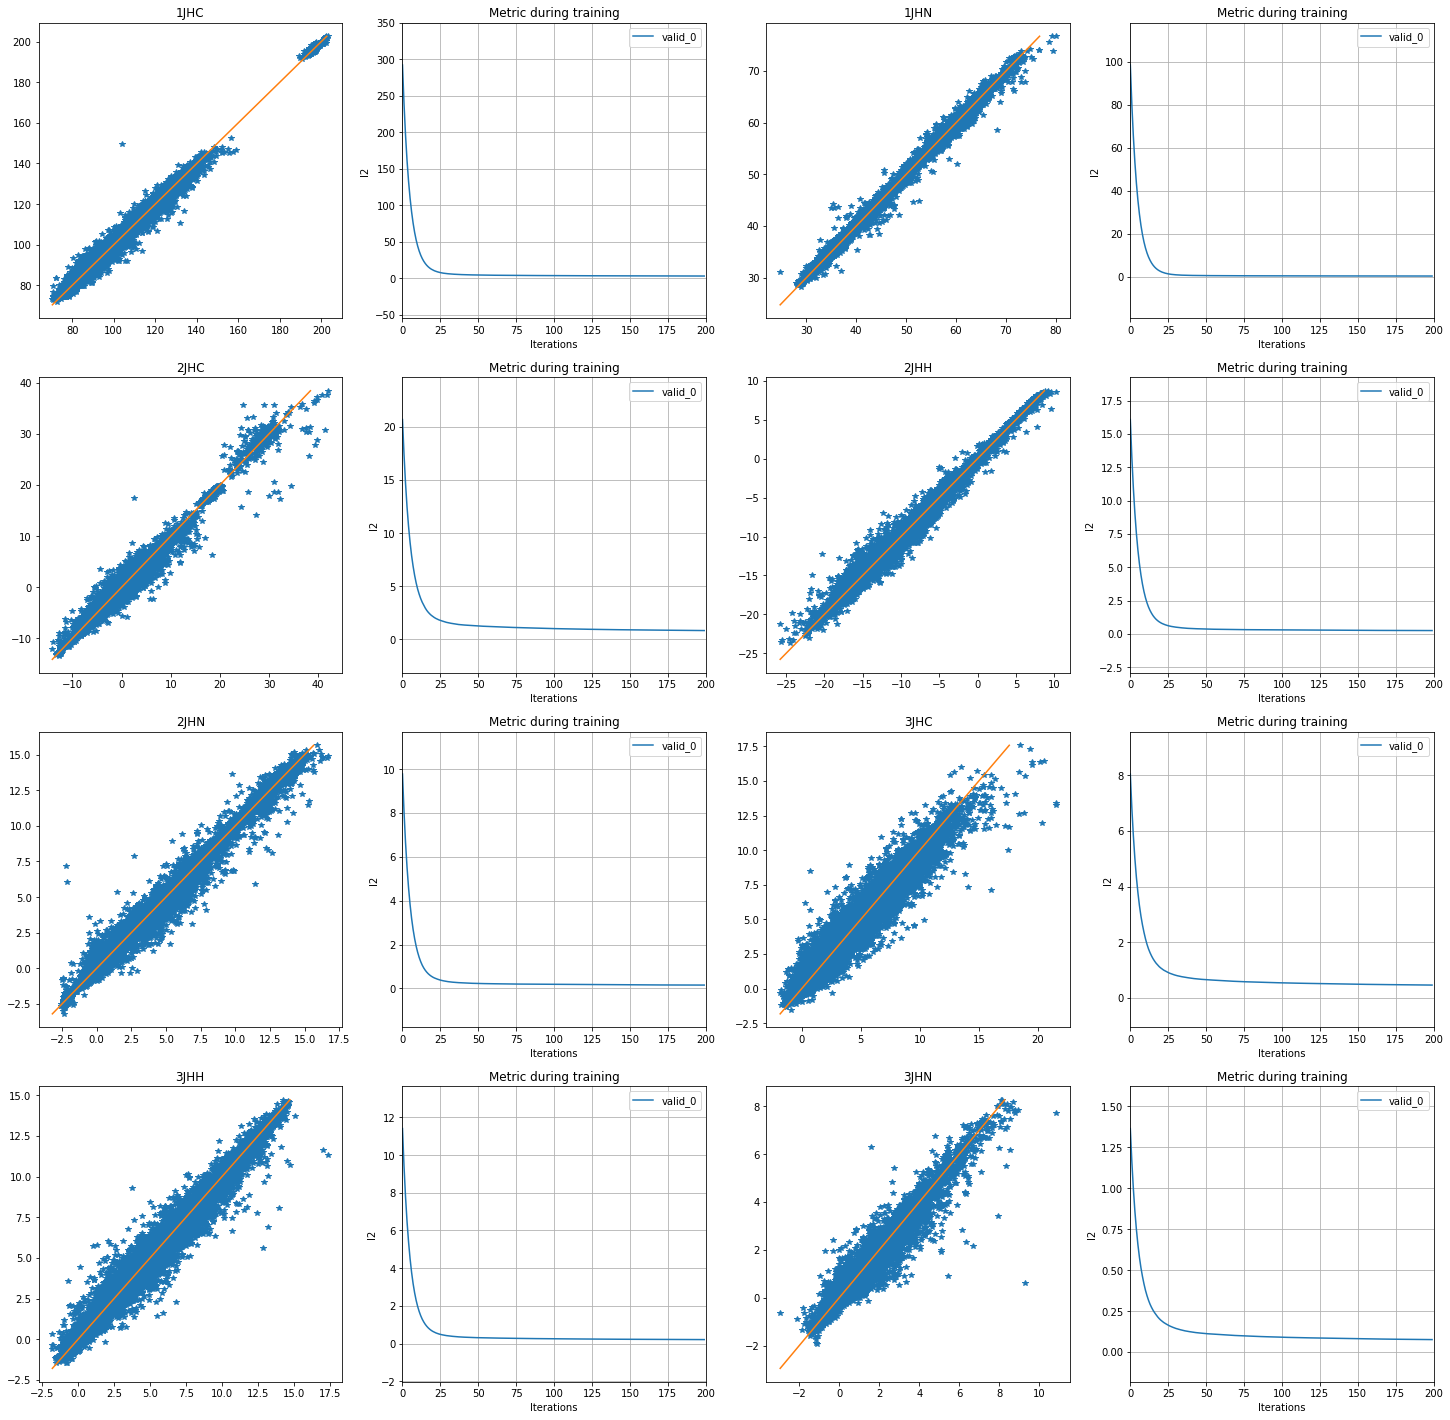

In [67]:
from models import LGBModel
from models import partition_data

coupling_types = sorted(labelled_enh.type.unique())
#coupling_types = ['3JHH']
models = {}
def run_test(data, count=None):
    global model
    
    plt.figure(figsize=(25, 25))
    for i, t in enumerate(coupling_types, 1):    
        data_df = data[data.type == t]
        if count is not None:
            data_df = data_df.head(count)

        train_df, valid_df, test_df = partition_data(data_df)
        
        if len(train_df) < 10 or len(test_df) < 10:
            continue
            
        print(f'Training {len(train_df)} samples for {t}')

        model = LGBModel(dict(molecules=molecules, 
                              structures=structures,
                              verbose=True),
                         lgb_model_args, lgb_fit_args)
        models[t] = model

        model.fit(train_df, train_df, valid_df, valid_df)
        output, score = model.evaluate(test_df, test_df)
        
        print(f'{t} score: {score} (trained on {len(train_df)} elements)')
        plt.subplot(4, 4, 2 * i - 1)
        plt.plot(test_df.scalar_coupling_constant, output, '*')
        mn = min(test_df.scalar_coupling_constant.min(), output.min())
        mx = min(test_df.scalar_coupling_constant.max(), output.max())
        plt.plot([mn, mx], [mn, mx])
        plt.title(t)
        
        ax = plt.subplot(4, 4, 2 * i)
        model.plot_metric(ax=ax)
    plt.show()
        
run_test(labelled_enh, 100000)


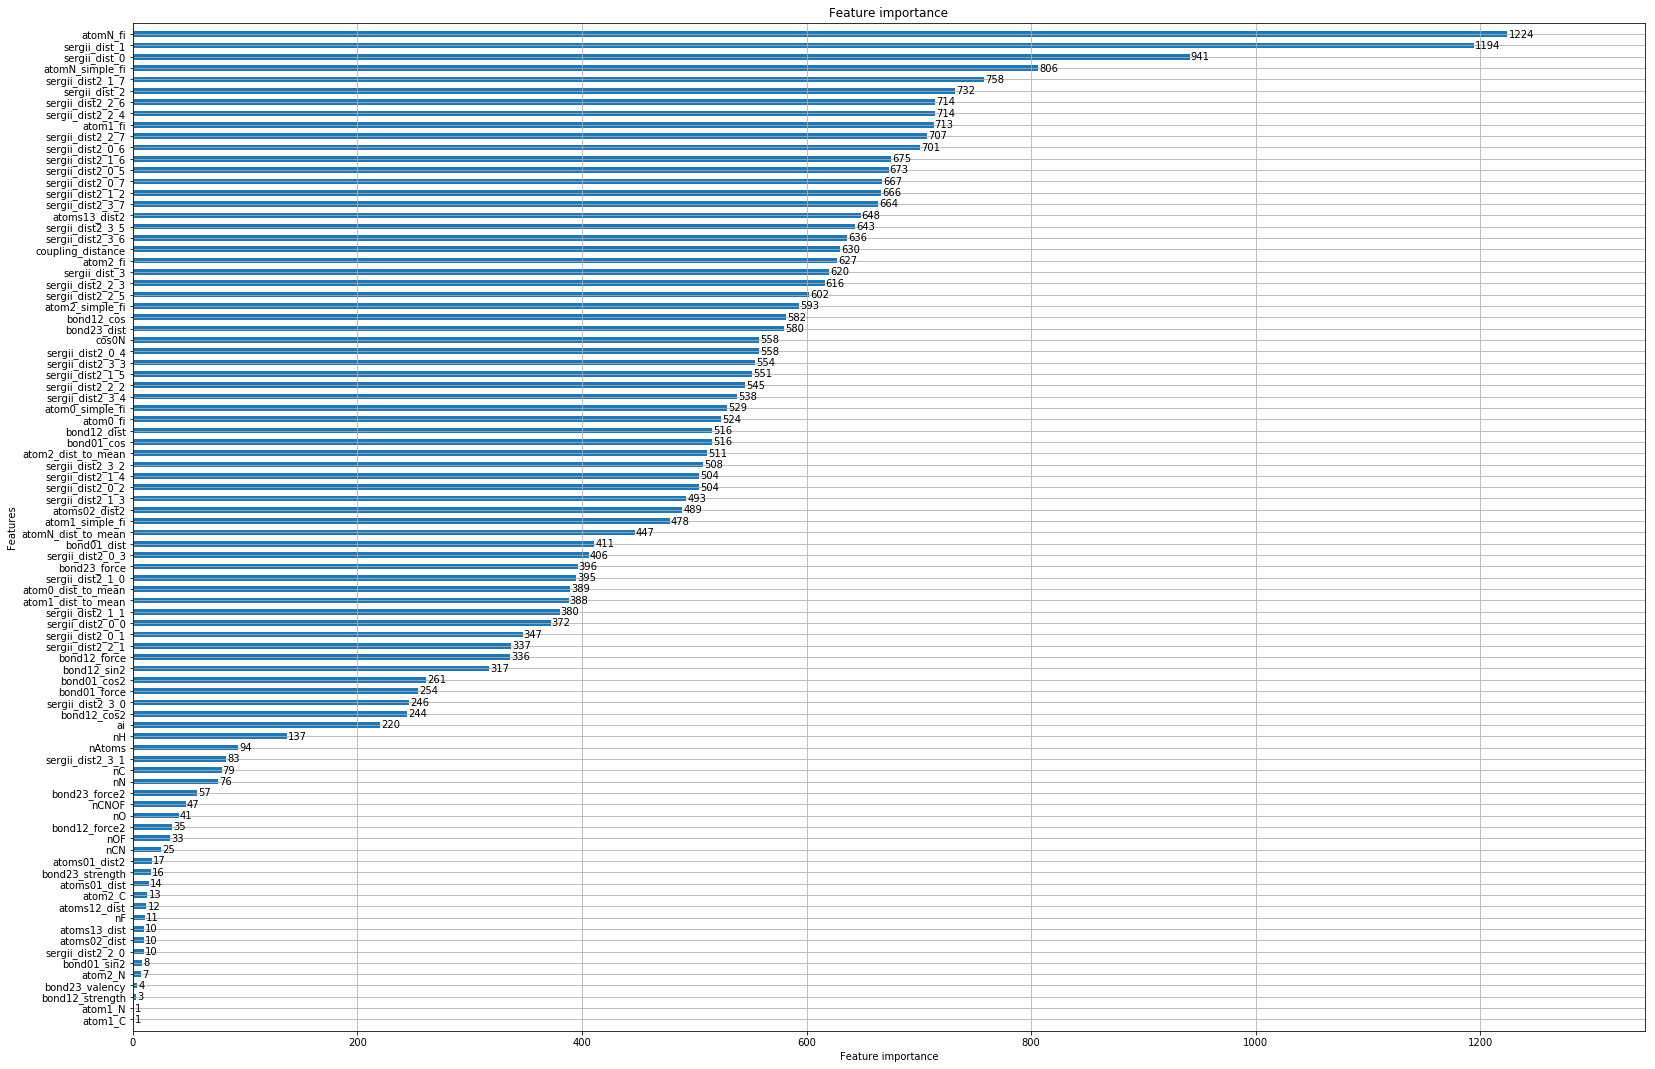

In [69]:
from models import LGBModel
fig = plt.figure(figsize=(21, 14))
model.plot_importance(ax=fig.add_axes([0, 0, 1, 1]), height=0.5)
plt.show()

In [41]:
model.last_numeric_input_df.loc[:, ['bond12_cos']].head()

,bond12_cos
78638,-0.329336
262263,-0.353853
361136,-0.329120
71155,-0.400130
742161,-0.390689


In [ ]:
list(model.last_numeric_input_df.columns)

In [72]:
lgb_model_args = dict(n_jobs=8,
                      max_depth=16,
                      boosting_type='gbdt',
                      num_leaves=65536, #128,
                      min_child_samples=20,
                      min_data_in_leaf=100,
                      learning_rate=0.1,
                      n_estimators=2000,
                      reg_alpha=0.1,
                      reg_lambda=0.3,
                      bagging_fraction = 0.9,
                      bagging_freq = 5,
                      num_iterations=2000
                      )
lgb_fit_args = dict(verbose=100)

In [75]:
from models import LGBModel

def train(data):
    models = {}
    for t in sorted(data.type.unique()):
        train_df = data[data.type == t]
        print(f'Training {len(train_df)} samples for {t}')
        model = LGBModel(dict(molecules=molecules, 
                              structures=structures),
                         lgb_model_args, lgb_fit_args)
        models[t] = model
        model.fit(train_df, train_df)
    
    return models

#models = train(labelled_enh.head(200))
models = train(labelled_enh)

Training 709416 samples for 1JHC


/home/gautham/apps/anaconda3/envs/kaggle-cpu/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



Training 43363 samples for 1JHN
Training 1140674 samples for 2JHC
Training 378036 samples for 2JHH
Training 119253 samples for 2JHN
Training 1510379 samples for 3JHC
[12, 2, 7] 12 7 
 dsgdb9nsd_133831
[17, 7, 2] 17 2 
 dsgdb9nsd_133831
Training 590611 samples for 3JHH
Training 166415 samples for 3JHN


In [76]:
def predict(data, models):
    out_df = None
    
    for t in sorted(data.type.unique()):
        predict_df = data[data.type == t]
        print(f'Predicting {len(predict_df)} samples for {t}')
        output = models[t].predict(predict_df)
        
        id = predict_df['id']
        out_df_coupling = pd.DataFrame(data={'id':id, 'scalar_coupling_constant':output}, index=predict_df.index)
        
        if out_df is None:
            out_df = out_df_coupling
        else:
            out_df = out_df.append(out_df_coupling).sort_index()

    return out_df.sort_index()
    
#prediction = predict(unlabelled_enh.head(200), models)
prediction = predict(unlabelled_enh, models)

Predicting 380609 samples for 1JHC
Predicting 24195 samples for 1JHN
Predicting 613138 samples for 2JHC
[13, 4, 3, 0, 1, 8] 13 8 
 dsgdb9nsd_037497
[17, 8, 1, 0, 3, 4] 17 4 
 dsgdb9nsd_037497
[12, 6, 7, 1] 12 1 
 dsgdb9nsd_072320
[14, 3, 2, 1, 8] 14 8 
 dsgdb9nsd_133863
[20, 7, 0, 1, 8] 20 8 
 dsgdb9nsd_133863
Predicting 203126 samples for 2JHH
Predicting 64424 samples for 2JHN
Predicting 811999 samples for 3JHC
[11, 1, 0, 3, 4] 11 4 
 dsgdb9nsd_037497
[13, 4, 3, 0, 1] 13 1 
 dsgdb9nsd_037497
[13, 4, 5, 6, 7] 13 7 
 dsgdb9nsd_037497
[14, 5, 6, 7, 8] 14 8 
 dsgdb9nsd_037497
[15, 5, 6, 7, 8] 15 8 
 dsgdb9nsd_037497
[16, 7, 6, 5, 4] 16 4 
 dsgdb9nsd_037497
[17, 8, 7, 6, 5] 17 5 
 dsgdb9nsd_037497
[9, 0, 1, 7, 6] 9 6 
 dsgdb9nsd_072320
[10, 2, 1, 7, 6] 10 6 
 dsgdb9nsd_072320
[11, 2, 1, 7, 6] 11 6 
 dsgdb9nsd_072320
[12, 6, 7, 1, 2] 12 2 
 dsgdb9nsd_072320
[14, 3, 2, 1, 0, 7] 14 7 
 dsgdb9nsd_133863
[20, 7, 0, 1, 2, 3] 20 3 
 dsgdb9nsd_133863
Predicting 317435 samples for 3JHH
[13, 4, 3, 0

In [77]:
prediction.head()

,id,scalar_coupling_constant
0,4658147,21.691583
1,4658148,136.655586
2,4658149,6.193597
3,4658150,147.304141
4,4658151,20.992060


In [78]:
prediction.to_csv('../data/pred.csv',index=False)